<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# Réseaux neuronaux
</div>

Quelques guides:
- keras https://www.tensorflow.org/tutorials/quickstart/beginner
- (tf2) https://becominghuman.ai/image-classification-with-tensorflow-2-0-without-keras-e6534adddab2
- (tf1) https://github.com/neodelphis/tensorflow-without-a-phd-french/blob/master/mnist_03_softmax.ipynb

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Essai Tensorflow
</div>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(x_train_3d, y_train), (x_test_3d, y_test) = mnist.load_data()
x_train_3d, x_test_3d = x_train_3d / 255.0, x_test_3d / 255.0
x_train = x_train_3d.reshape(x_train_3d.shape[0], -1)
print(x_train.shape)
x_test = x_test_3d.reshape(x_test_3d.shape[0], -1)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)

])

In [9]:
predictions = model(x_train_3d[:1]).numpy()
predictions

array([[ 0.7683347 , -0.14926413,  0.13278309,  0.7799784 , -0.6609365 ,
         0.029957  ,  0.845154  ,  0.44063532,  0.06257337,  0.07402337]],
      dtype=float32)

In [10]:
tf.nn.softmax(predictions).numpy()

array([[0.15499595, 0.06191733, 0.08209256, 0.15681122, 0.03711896,
        0.0740708 , 0.1673719 , 0.11168693, 0.07652654, 0.07740781]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train[:1], predictions).numpy()

2.602734

In [13]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [14]:
model.fit(x_train_3d, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2942 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1398 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1056 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0871 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0720 - accuracy: 0.9775


In [15]:
model.evaluate(x_test_3d,  y_test, verbose=2)

313/313 - 0s - loss: 0.0747 - accuracy: 0.9770 - 435ms/epoch - 1ms/step


[0.07468186318874359, 0.9769999980926514]

In [16]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [17]:
probability_model(x_test_3d)


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[2.96375561e-07, 8.32493683e-08, 1.52106632e-05, ...,
        9.98891175e-01, 2.02936235e-07, 7.06023138e-06],
       [1.06177467e-08, 5.68848773e-05, 9.99938726e-01, ...,
        2.30565458e-12, 1.68785743e-06, 1.06246338e-12],
       [6.96147282e-08, 9.99084711e-01, 2.26910561e-05, ...,
        8.04765150e-04, 5.78692525e-05, 1.39249721e-07],
       ...,
       [7.92323618e-13, 6.86306394e-12, 5.82442081e-11, ...,
        5.77615367e-07, 1.13313990e-06, 1.23907676e-05],
       [5.11200371e-09, 1.38088221e-10, 1.27636625e-11, ...,
        3.34796302e-10, 1.85597619e-05, 3.35225070e-10],
       [6.48217702e-09, 9.71517831e-12, 1.16347621e-06, ...,
        1.58878704e-12, 2.39188447e-09, 1.67617586e-10]], dtype=float32)>

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

In [19]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  c = 'red'
  if predicted_label == true_label:
    c = 'green'

  thisplot[true_label].set_color('blue')
  thisplot[predicted_label].set_color(c)

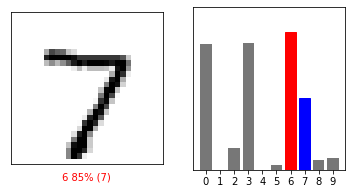

In [24]:
for i in range(0, 1):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, x_test_3d)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  y_test|i)
    plt.show()

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Softmax
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Réseau 1 couche de 10 neurones
</div>

Créer et mesurer les résultats d'un réseau neuronal simple couche complètement connecté avec softmax comme fonction d'activation

In [45]:
model_softmax_simple = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax')])

In [46]:
predictions_softmax_simple = model_softmax_simple(x_train[:1]).numpy()
print(predictions_softmax_simple.shape)
predictions_softmax_simple

(1, 10)


array([[0.04773339, 0.10197486, 0.14750598, 0.0958707 , 0.07728292,
        0.07075073, 0.09530593, 0.10651741, 0.07848506, 0.17857301]],
      dtype=float32)

In [50]:
softmax_simple = tf.nn.softmax(predictions_softmax_simple).numpy()
print(sum(softmax_simple[0]))
print(max(softmax_simple[0]))
softmax_simple[0]

1.0000001043081284
0.10810278


array([0.09484489, 0.1001315 , 0.10479598, 0.09952215, 0.09768933,
       0.09705328, 0.09946595, 0.10058739, 0.09780684, 0.10810278],
      dtype=float32)

In [51]:
model_softmax_simple.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [52]:
model_softmax_simple.fit(x_train, y_train, epochs=5)

Epoch 1/5


c:\Program Files\Python_venv\tensor_flow\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 2s 847us/step - loss: 0.4671 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 2s 850us/step - loss: 0.3037 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.2832 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 2s 828us/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 825us/step - loss: 0.2665 - accuracy: 0.9254


In [53]:
model_softmax_simple.evaluate(x_test,  y_test, verbose=2)

c:\Program Files\Python_venv\tensor_flow\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 0s - loss: 0.2697 - accuracy: 0.9243 - 274ms/epoch - 874us/step


[0.2697469890117645, 0.9243000149726868]

In [54]:
probability_model = tf.keras.Sequential([
  model_softmax_simple,
  tf.keras.layers.Softmax()
])

In [55]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08538955, 0.08538918, 0.08538994, 0.08570998, 0.08538923,
        0.08539128, 0.08538918, 0.2311377 , 0.08539084, 0.08542318],
       [0.08561896, 0.0855361 , 0.22880654, 0.08559311, 0.0855351 ,
        0.08597724, 0.08631307, 0.0855351 , 0.08554968, 0.0855351 ],
       [0.0855922 , 0.2278921 , 0.08653563, 0.08579244, 0.08560611,
        0.08565258, 0.08571815, 0.08567432, 0.08591551, 0.08562091],
       [0.23191783, 0.08533999, 0.08534253, 0.08534022, 0.08533999,
        0.08534669, 0.08534946, 0.08534107, 0.08534122, 0.08534095],
       [0.0857293 , 0.08569904, 0.08579873, 0.08570275, 0.22615205,
        0.08570712, 0.08589686, 0.08593606, 0.08599075, 0.08738737]],
      dtype=float32)>

TypeError: Invalid shape (784,) for image data

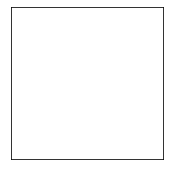

In [79]:
for i in range(0, 5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions_softmax_simple[i], y_test, x_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions_softmax_simple[i],  y_test|i)
    plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Réseau 2 couches : 128 neurones et 10 neurones
</div>

In [67]:
model_softmax = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='softmax'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)

])

In [68]:
predictions_softmax = model_softmax(x_train_3d[:1]).numpy()
predictions_softmax

array([[ 1.0553722e-02,  1.4305409e-02,  1.0980875e-02,  6.0188468e-05,
         3.8988288e-03, -2.2858210e-02,  6.8971873e-03, -3.6608891e-03,
         1.0756929e-02, -2.3373147e-02]], dtype=float32)

In [69]:
softmax = tf.nn.softmax(predictions_softmax).numpy()
print(sum(softmax[0]))
print(max(softmax[0]))
softmax


0.9999999850988388
0.10135561


array([[0.10097607, 0.10135561, 0.10101922, 0.09992202, 0.10030632,
        0.09765801, 0.10060752, 0.0995509 , 0.10099659, 0.09760773]],
      dtype=float32)

In [70]:
model_softmax = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation=tf.keras.activations.softmax),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)

])

In [71]:
predictions_soft = model_softmax(x_test_3d).numpy()
predictions_soft

array([[ 0.00645617, -0.01054242,  0.01388425, ...,  0.00385361,
        -0.00472878,  0.01007769],
       [ 0.00751045, -0.00580619,  0.00560118, ...,  0.00767271,
         0.00408551,  0.00308219],
       [ 0.0088557 , -0.00052183,  0.01017473, ...,  0.00630196,
        -0.00388752,  0.00272595],
       ...,
       [ 0.00777148, -0.01603617,  0.01406769, ...,  0.00547225,
        -0.00841407,  0.00062506],
       [ 0.01225357, -0.00729113,  0.00923649, ...,  0.00730733,
         0.0026334 ,  0.0001162 ],
       [ 0.01054065, -0.0141624 ,  0.00970972, ..., -0.00243652,
        -0.00436969,  0.01122427]], dtype=float32)

In [72]:
loss_fn_soft = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn_soft(y_test, predictions_soft).numpy()

2.3017323

In [73]:
model_softmax.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [74]:
model_softmax.fit(x_train_3d, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4622 - accuracy: 0.5555
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0179 - accuracy: 0.6115
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8988 - accuracy: 0.6663
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7634 - accuracy: 0.7462
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6968 - accuracy: 0.7587


In [75]:
print("[0.2697469890117645, 0.9243000149726868] avec 1 couche de 10 neurones")
model_softmax.evaluate(x_test_3d,  y_test, verbose=2)

[0.2697469890117645, 0.9243000149726868] avec 1 couche de 10 neurones
313/313 - 0s - loss: 0.3692 - accuracy: 0.9190 - 370ms/epoch - 1ms/step


[0.36922335624694824, 0.9190000295639038]

In [76]:
probability_model_soft = tf.keras.Sequential([
  model_softmax,
  tf.keras.layers.Softmax()
])

In [78]:
probability_model_soft(x_test_3d)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.80908572e-03, 2.77346978e-03, 1.00535676e-02, ...,
        9.01470244e-01, 3.34859826e-03, 6.74273819e-02],
       [6.82891114e-03, 4.93900990e-03, 8.72063577e-01, ...,
        6.14243094e-03, 8.87204520e-03, 3.29466769e-03],
       [4.44173784e-04, 9.70329046e-01, 3.97616345e-03, ...,
        4.57501318e-03, 6.45315647e-03, 3.19015421e-03],
       ...,
       [7.65620032e-03, 4.86581586e-03, 1.19095454e-02, ...,
        2.33897734e-02, 1.82412863e-02, 2.21111551e-01],
       [1.95900518e-02, 1.21452753e-02, 1.27148293e-02, ...,
        8.61272868e-03, 1.01670049e-01, 2.50273645e-02],
       [8.02869815e-03, 2.71328771e-03, 2.68879645e-02, ...,
        4.18686913e-03, 1.26417065e-02, 9.36168188e-04]], dtype=float32)>

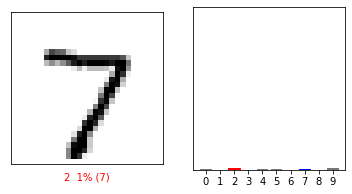

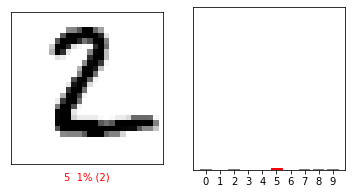

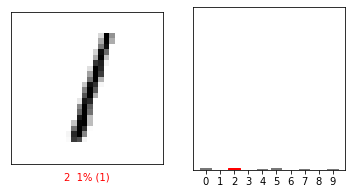

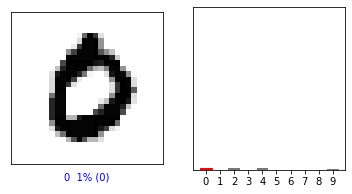

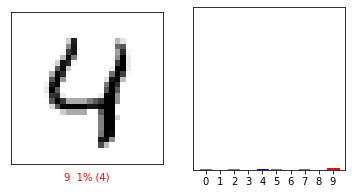

In [81]:
for i in range(0, 5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions_soft[i], y_test, x_test_3d)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions_soft[i],  y_test|i)
    plt.show()

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 3.Sigmoïde
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Réseau 1 couche de 10 neurones
</div>

In [88]:
model_sigmoid_simple = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='sigmoid')])

In [89]:
predictions_sigmoid_simple = model_sigmoid_simple(x_train[:1]).numpy()
print(predictions_sigmoid_simple.shape)
predictions_sigmoid_simple

(1, 10)


array([[0.4117762 , 0.71592015, 0.42859292, 0.5646655 , 0.53811127,
        0.58421737, 0.57156676, 0.52706146, 0.5330163 , 0.33314443]],
      dtype=float32)

In [90]:
loss_fn(y_train[:1], predictions_sigmoid_simple).numpy()

2.2442956

In [91]:
model_sigmoid_simple.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [92]:
model_sigmoid_simple.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 936us/step - loss: 0.4690 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.3040 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.2736 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9263


In [94]:
print("[0.2697469890117645, 0.9243000149726868] avec 1 couche de 10 neurones softmax")
print("[0.36922335624694824, 0.9190000295639038] avec 2 couches softmax")
print("[0.26996344327926636, 0.9247000217437744] avec 1 couche de 10 neurones signoide")
model_sigmoid_simple.evaluate(x_test,  y_test, verbose=2)

[0.2697469890117645, 0.9243000149726868] avec 1 couche de 10 neurones softmax
[0.36922335624694824, 0.9190000295639038] avec 2 couches softmax
313/313 - 0s - loss: 0.2700 - accuracy: 0.9247 - 271ms/epoch - 867us/step


[0.26996344327926636, 0.9247000217437744]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Réseau 2 couches : 100 neurones sigmoid + 10 neurones softmax
</div>

Créer et mesurer les résultats d'un réseau neuronal complètement connecté:
- première couche 100 neurones avec sigmoïde comme fonction d'activation
- deuxième couche de 10 neurones avec softmax comme fonction d'activation

In [95]:
model_100_sig_10_soft = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation='sigmoid'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

predictions_100_sig_10_soft = model_100_sig_10_soft(x_train_3d[:1]).numpy()
print(predictions_100_sig_10_soft.shape)
print(predictions_100_sig_10_soft)

print(loss_fn(y_train[:1], predictions_100_sig_10_soft).numpy())
model_100_sig_10_soft.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model_100_sig_10_soft.fit(x_train_3d, y_train, epochs=5)

(1, 10)
[[0.05067446 0.09055723 0.18306279 0.07907002 0.06733479 0.14740008
  0.21791925 0.04635651 0.05115971 0.06646509]]
2.2568889
Epoch 1/5


c:\Program Files\Python_venv\tensor_flow\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4137 - accuracy: 0.8945
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2029 - accuracy: 0.9416
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1522 - accuracy: 0.9564
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1210 - accuracy: 0.9650
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0995 - accuracy: 0.9719


In [139]:
def get_model(x_train, y_train, x_test=None,  y_test=None, couche_activations=[(100,'sigmoid'), (10, 'softmax')], epochs=5,input_shape=None,dropout = None, verbose=0):
    nodes = []
    if input_shape:
        nodes.append(tf.keras.layers.Flatten(input_shape=input_shape))
        # tf.keras.layers.Flatten(input_shape=(28,28)),
    
    for nb_nodes, acti in couche_activations:
        nodes.append(tf.keras.layers.Dense(nb_nodes, activation=acti))
        # tf.keras.layers.Dense(100, activation='sigmoid'),
        # tf.keras.layers.Dense(10, activation='softmax')
        if dropout:
            tf.keras.layers.Dropout(dropout)
            # tf.keras.layers.Dropout(0.2),
    
    model = tf.keras.models.Sequential(nodes)
    # predictions = model(x_train[:1]).numpy()

    # print(predictions.shape)
    # print(predictions)

    y_categories = tf.keras.utils.to_categorical(y_train, num_classes=np.unique(y_train).shape[0])
    y_test_categories = tf.keras.utils.to_categorical(y_test, num_classes=np.unique(y_train).shape[0])
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    # loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    # print(loss_fn(y_categories, predictions).numpy())
    
    model.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])
    model.fit(x_train, y_categories, epochs=epochs)
    # model.fit(x_train, y_train, epochs=epochs)

    if x_test is not None and y_test is not None:
        print(f'\n----------------------------------------------------------------------------')
        print(f'{model.evaluate(x_test,  y_test_categories, verbose=verbose)} for {len(couche_activations)} couches ==> ', end='')
        for nb_nodes, acti in couche_activations:
            print(f'{nb_nodes} nodes on {acti}, ', end='')
        print(f'\n----------------------------------------------------------------------------')
        
    return model

In [130]:
y_categories = tf.keras.utils.to_categorical(y_train, num_classes=np.unique(y_train).shape[0])
print(y_categories[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [113]:
np.unique(y_train).shape[0]

10

In [115]:
print("[0.2697469890117645, 0.9243000149726868] avec 1 couche de 10 neurones softmax")
print("[0.36922335624694824, 0.9190000295639038] avec 2 couches softmax")
print("[0.26996344327926636, 0.9247000217437744] avec 1 couche de 10 neurones signoide")
print("[0.1059708520770073, 0.9674000144004822] avec 2 couches de 100 neurones sigmoid + 10 neurones softmax")

model_100_sig_10_soft.evaluate(x_test_3d,  y_test, verbose=2)

[0.2697469890117645, 0.9243000149726868] avec 1 couche de 10 neurones softmax
[0.36922335624694824, 0.9190000295639038] avec 2 couches softmax
[0.26996344327926636, 0.9247000217437744] avec 1 couche de 10 neurones signoide
[0.1059708520770073, 0.9674000144004822] avec 2 couches de 100 neurones sigmoid + 10 neurones softmax
313/313 - 0s - loss: 0.1060 - accuracy: 0.9674 - 383ms/epoch - 1ms/step


[0.1059708520770073, 0.9674000144004822]

In [107]:
np.empty((1,1))

array([[0.96899998]])

In [106]:
np.empty((1,1))[0]

array([0.96899998])

In [141]:
m2 = get_model(x_train, y_train, x_test, y_test, couche_activations=[(10, 'softmax')], epochs=5)
m3 = get_model(x_train_3d, y_train, x_test_3d, y_test, couche_activations=[(10, 'softmax')], epochs=5,input_shape=(28,28))
m7 = get_model(x_train, y_train, x_test, y_test, couche_activations=[(100,'sigmoid'), (10, 'softmax')], epochs=5)
m8 = get_model(x_train, y_train, x_test, y_test, couche_activations=[(100,'sigmoid'), (10, 'softmax')], epochs=5,dropout = 0.2)
m9 = get_model(x_train_3d, y_train, x_test_3d, y_test, couche_activations=[(100,'sigmoid'), (10, 'softmax')], epochs=5,input_shape=(28,28))
m10_drop_out = get_model(x_train_3d, y_train, x_test_3d, y_test, couche_activations=[(100,'sigmoid'), (10, 'softmax')], epochs=5,input_shape=(28,28),dropout = 0.2)


Epoch 1/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.1192 - accuracy: 0.8461
Epoch 2/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.0772 - accuracy: 0.9020
Epoch 3/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.0719 - accuracy: 0.9094
Epoch 4/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.0692 - accuracy: 0.9130
Epoch 5/5
1875/1875 [==============================] - 2s 850us/step - loss: 0.0674 - accuracy: 0.9155

----------------------------------------------------------------------------
[0.06534282118082047, 0.9182000160217285] for 1 couches ==> 10 nodes on softmax, 
----------------------------------------------------------------------------
Epoch 1/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.1196 - accuracy: 0.8457
Epoch 2/5
1875/1875 [==============================] - 2s 950us/step - loss: 0.0773 - accuracy: 0.9024
Epoch 3/5
1875/1875 [=====================

Meilleur score avec  `m7 = get_model(x_train, y_train, x_test, y_test, couche_activations=[(100,'sigmoid'), (10, 'softmax')], epochs=5)`